In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
accuracy_score, precision_score, recall_score,
f1_score, confusion_matrix, classification_report
)

In [7]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [8]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [9]:
df.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [11]:
df.shape

(1000, 14)

In [12]:
df.dtypes

,0
patientid,int64
age,int64
gender,int64
chestpain,int64
restingBP,int64
serumcholestrol,int64
fastingbloodsugar,int64
restingrelectro,int64
maxheartrate,int64
exerciseangia,int64


In [13]:
df.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df = df.drop_duplicates()

In [16]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [17]:
x = df.drop('target', axis=1)
y = df['target']

In [18]:
y.head()

,target
0,1
1,0
2,0
3,1
4,1


In [19]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [20]:
scaled_x

array([[-1.70855459,  0.21046388,  0.55424682, ...,  1.50724524,
         1.45535031,  1.81967847],
       [-1.70306755, -0.51759105,  0.55424682, ...,  0.57695462,
        -0.53828025, -0.22720395],
       [-1.7030254 , -0.01355302,  0.55424682, ...,  1.33281575,
        -0.53828025, -1.25064516],
       ...,
       [ 1.69881811,  1.10653148,  0.55424682, ..., -0.76033815,
         1.45535031, -0.22720395],
       [ 1.70664272, -0.23756992,  0.55424682, ...,  1.85610422,
         1.45535031,  0.79623726],
       [ 1.70745393, -1.35765443,  0.55424682, ...,  1.15838626,
        -1.53509553, -1.25064516]])

In [21]:
x_test,x_train,y_test,y_train = train_test_split(scaled_x, y, test_size=0.3, random_state=42)

In [22]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
logreg = LogisticRegression(max_iter=1000)

In [24]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100,],
    "penalty": ["l2"],
    "solver": ["liblinear"]
}

In [25]:
grid_lr = GridSearchCV(logreg, param_grid, cv=5, scoring="f1")
grid_lr.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [26]:
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(x_test_scaled)

In [27]:
# Evaluation
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))
print("precision : ", precision_score(y_test, y_pred_lr))
print("recall : ", recall_score(y_test, y_pred_lr))
print("f1 score : ", f1_score(y_test, y_pred_lr))

confusion_matrix(y_test, y_pred_lr)

Accuracy :  0.95
precision :  0.9636803874092009
recall :  0.9521531100478469
f1 score :  0.9578820697954272


array([[267,  15],
       [ 20, 398]])

In [28]:
dt = DecisionTreeClassifier(random_state=42)
param_dt = {
    "max_depth": [3, 5, 6, 7, 10],
    "min_samples_split": [2, 3, 5, 6, 9,],
    "criterion": ["gini", "entropy"]
}

In [29]:
grid_dt = GridSearchCV(dt, param_dt, cv=5, scoring="f1")
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 6, 7, 10],
                         'min_samples_split': [2, 3, 5, 6, 9]},
             scoring='f1')

In [30]:
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)

In [31]:
print("classiication", classification_report(y_test, y_pred_dt))

classiication               precision    recall  f1-score   support

           0       0.84      0.94      0.89       282
           1       0.96      0.88      0.92       418

    accuracy                           0.90       700
   macro avg       0.90      0.91      0.90       700
weighted avg       0.91      0.90      0.90       700



In [35]:
# Random fores
rf = RandomForestClassifier(random_state=42)
param_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 6, 7, 10],
    "min_samples_split": [2, 3, 5, 6, 9,]
}

grid_rf = GridSearchCV(rf, param_rf, cv=5, scoring="f1")
grid_rf.fit(x_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

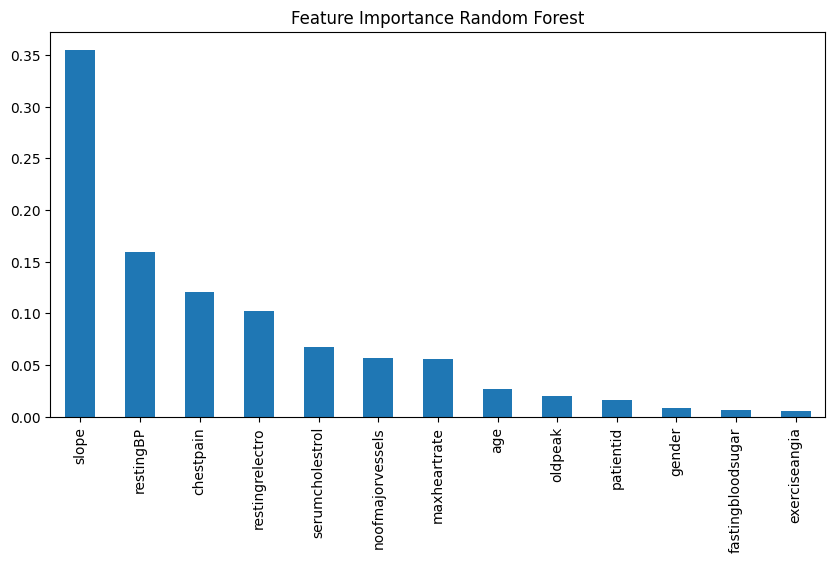

In [36]:
# feature importance
importances = pd.Series(best_rf.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance Random Forest")
plt.show()

In [37]:
result = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    "Precision": [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf)],
    "Recall": [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf)],
    "F1 Score": [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf)]
})

In [38]:
print(result)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.950000   0.963680  0.952153  0.957882
1        Decision Tree  0.904286   0.955844  0.880383  0.916563
2        Random Forest  0.945714   0.956731  0.952153  0.954436


In [39]:
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.950000,0.963680,0.952153,0.957882
1,Decision Tree,0.904286,0.955844,0.880383,0.916563
2,Random Forest,0.945714,0.956731,0.952153,0.954436


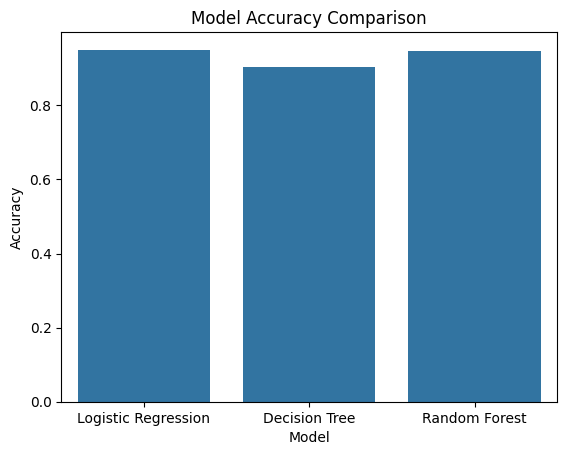

In [40]:
sns.barplot(x="Model", y="Accuracy", data=result)
plt.title("Model Accuracy Comparison")
plt.show()

**Final Answers**


*   Best Model: Random Forest
*   Recommended Model: Random Forest (high recall & robustness)

*   Risk of False Negatives:



  * A patient with heart disease predicted as healthy

  * Can delay treatment and lead to severe outcomes or death





